In [1]:
%pwd

u'/home/t.cri.ksilliman/OA_RNA/QC_Output'

# Oyster
## FastQC raw reads

In [1]:
%%sh
module load java-jdk/1.8.0_92
module load fastqc/0.11.5

mkdir /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output

fastqc -o /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output --extract /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/201802_2500_Raw/Oyster/*fastq -t 10

Analysis complete for KS-Lib1-CA-14A_S26_L001_R1_001.fastq
Analysis complete for KS-Lib1-BC-16C_S10_L001_R1_001.fastq
Analysis complete for KS-Lib1-BC-9M_S8_L001_R1_001.fastq
Analysis complete for KS-Lib1-BC-16M_S3_L001_R1_001.fastq
Analysis complete for KS-Lib1-OR-1C_S21_L001_R1_001.fastq
Analysis complete for KS-Lib1-BC-9A_S22_L001_R1_001.fastq
Analysis complete for KS-Lib1-CA-14M_S19_L001_R1_001.fastq
Analysis complete for KS-Lib1-CA-6A_S24_L001_R1_001.fastq
Analysis complete for KS-Lib1-OR-24C_S11_L001_R1_001.fastq
Analysis complete for KS-Lib1-NF-G28_S16_L001_R1_001.fastq
Analysis complete for KS-Lib1-BC-9C_S7_L001_R1_001.fastq
Analysis complete for KS-Lib2-BC-16A_S33_L002_R1_001.fastq
Analysis complete for KS-Lib1-WD-360A_S27_L001_R1_001.fastq
Analysis complete for KS-Lib1-SN-31G_S13_L001_R1_001.fastq
Analysis complete for KS-Lib2-CA-6M_S51_L002_R1_001.fastq
Analysis complete for KS-Lib2-OR-24M_S34_L002_R1_001.fastq
Analysis complete for KS-Lib1-WD-360G_S28_L001_R1_001.fastq
Anal

Started analysis of KS-Lib1-BC-16C_S10_L001_R1_001.fastq
Started analysis of KS-Lib1-BC-16M_S3_L001_R1_001.fastq
Started analysis of KS-Lib1-BC-9A_S22_L001_R1_001.fastq
Approx 5% complete for KS-Lib1-BC-16C_S10_L001_R1_001.fastq
Started analysis of KS-Lib1-BC-9C_S7_L001_R1_001.fastq
Approx 5% complete for KS-Lib1-BC-16M_S3_L001_R1_001.fastq
Started analysis of KS-Lib1-BC-9M_S8_L001_R1_001.fastq
Approx 5% complete for KS-Lib1-BC-9A_S22_L001_R1_001.fastq
Approx 10% complete for KS-Lib1-BC-16C_S10_L001_R1_001.fastq
Started analysis of KS-Lib1-CA-14A_S26_L001_R1_001.fastq
Started analysis of KS-Lib1-CA-14M_S19_L001_R1_001.fastq
Approx 10% complete for KS-Lib1-BC-16M_S3_L001_R1_001.fastq
Started analysis of KS-Lib1-CA-6A_S24_L001_R1_001.fastq
Approx 15% complete for KS-Lib1-BC-16C_S10_L001_R1_001.fastq
Started analysis of KS-Lib1-NF-G28_S16_L001_R1_001.fastq
Started analysis of KS-Lib1-OR-1C_S21_L001_R1_001.fastq
Approx 5% complete for KS-Lib1-CA-14M_S19_L001_R1_001.fastq
Approx 15% complet

In [2]:
%%sh
multiqc -n raw_2500_oyster_multiqc /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/ --flat -o /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/

Searching 559 files..


[INFO   ]         multiqc : This is MultiQC v1.4
[INFO   ]         multiqc : Template    : default
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/'
[INFO   ]          fastqc : Found 28 reports
[INFO   ]         multiqc : Compressing plot data
[INFO   ]         multiqc : Report      : ../../../../scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/raw_2500_oyster_multiqc.html
[INFO   ]         multiqc : Data        : ../../../../scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/raw_2500_oyster_multiqc_data
[INFO   ]         multiqc : MultiQC complete



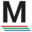
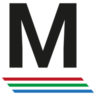
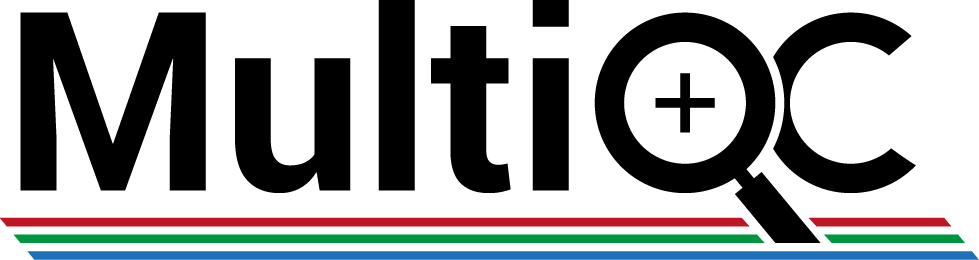
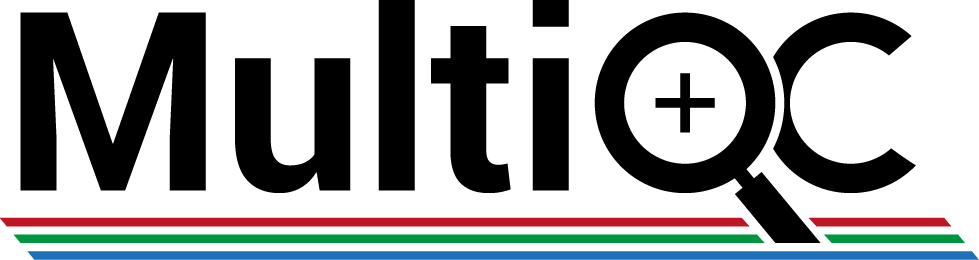
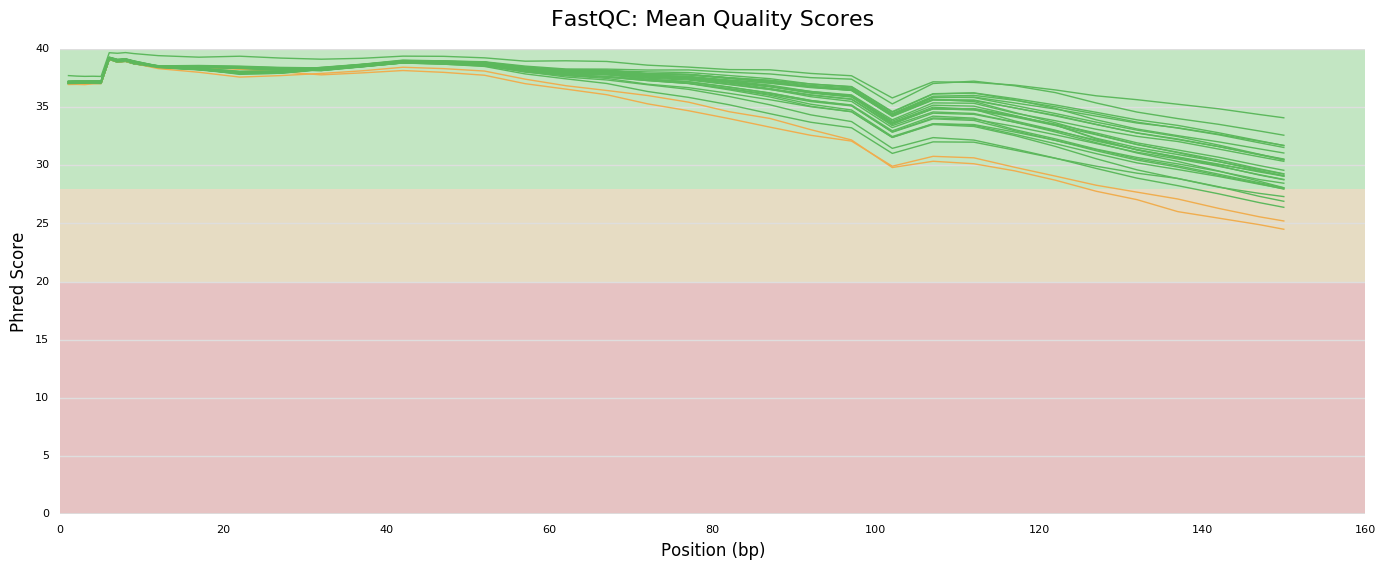
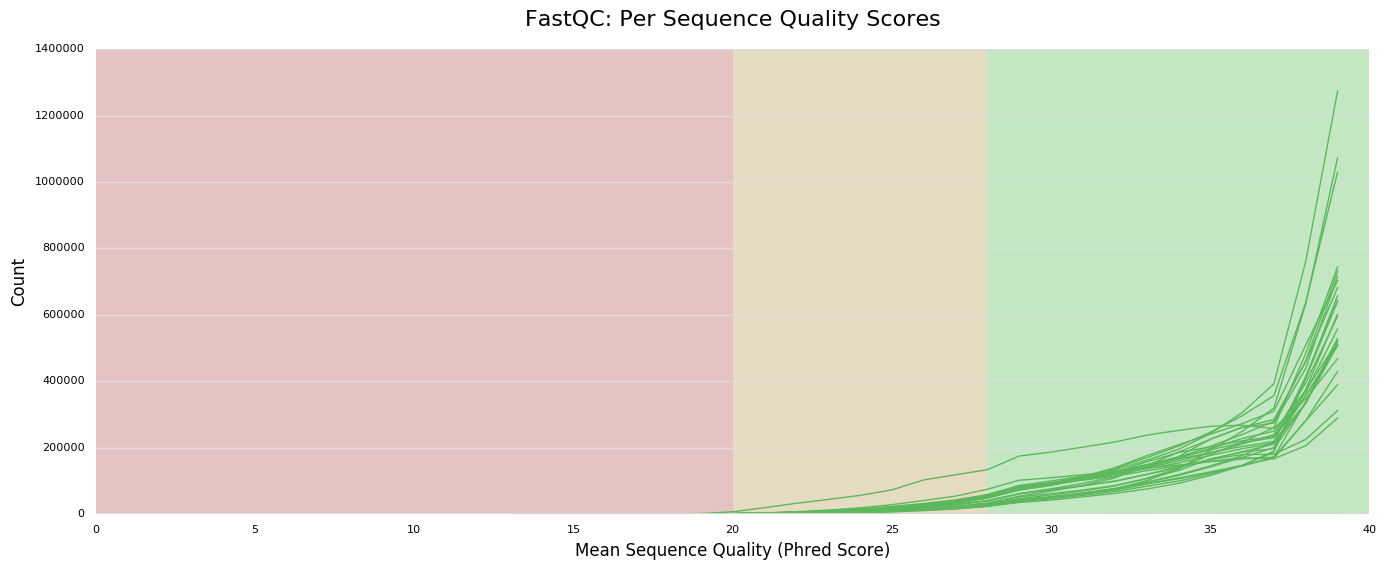
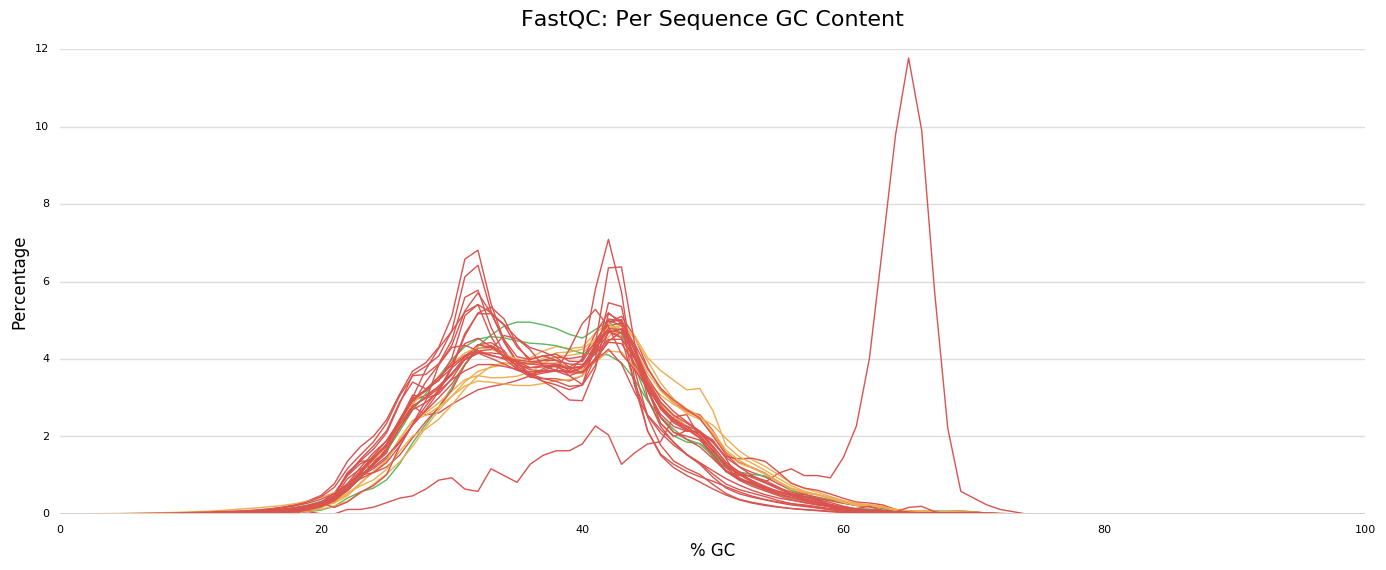
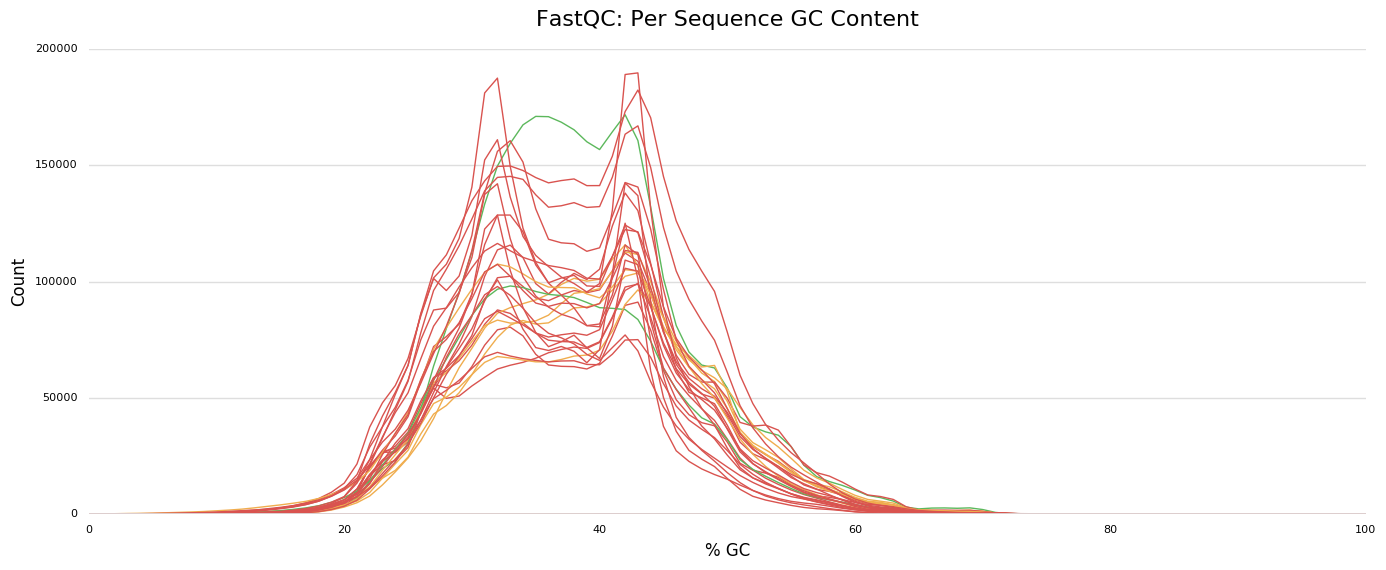
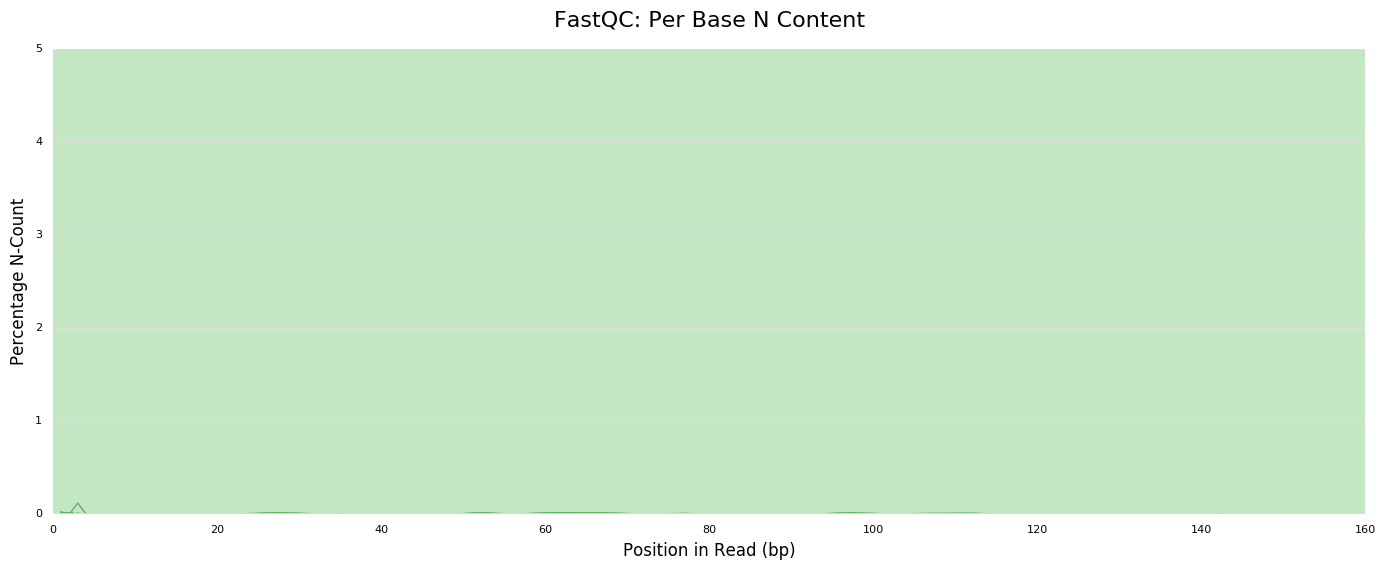
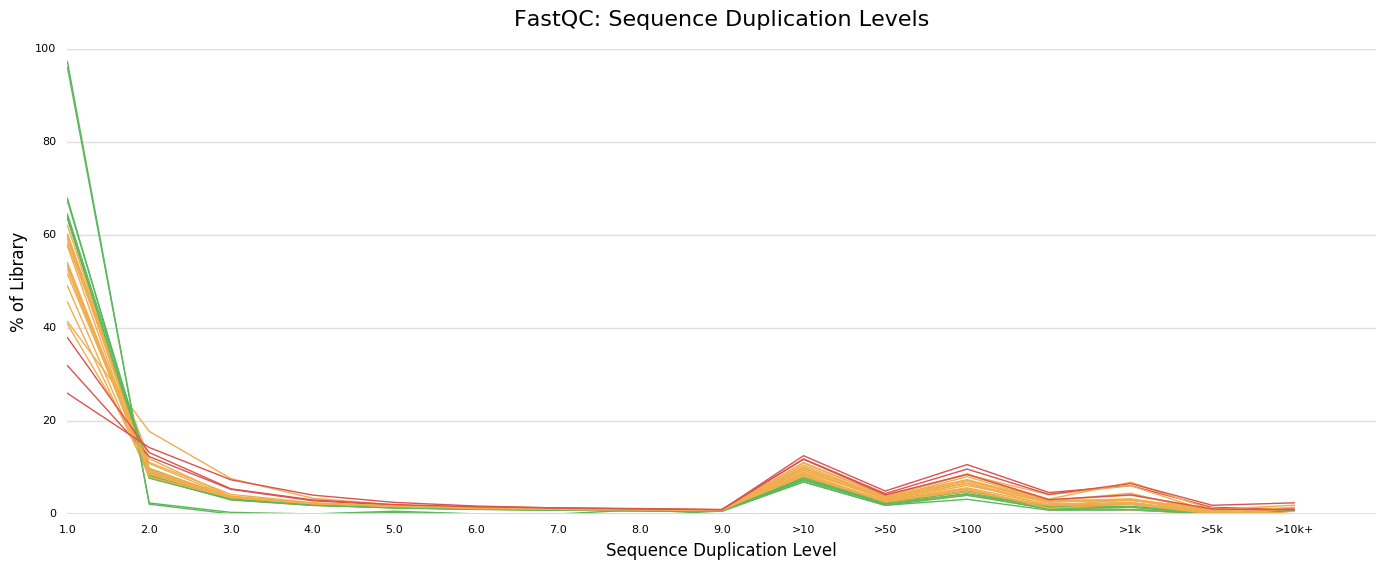
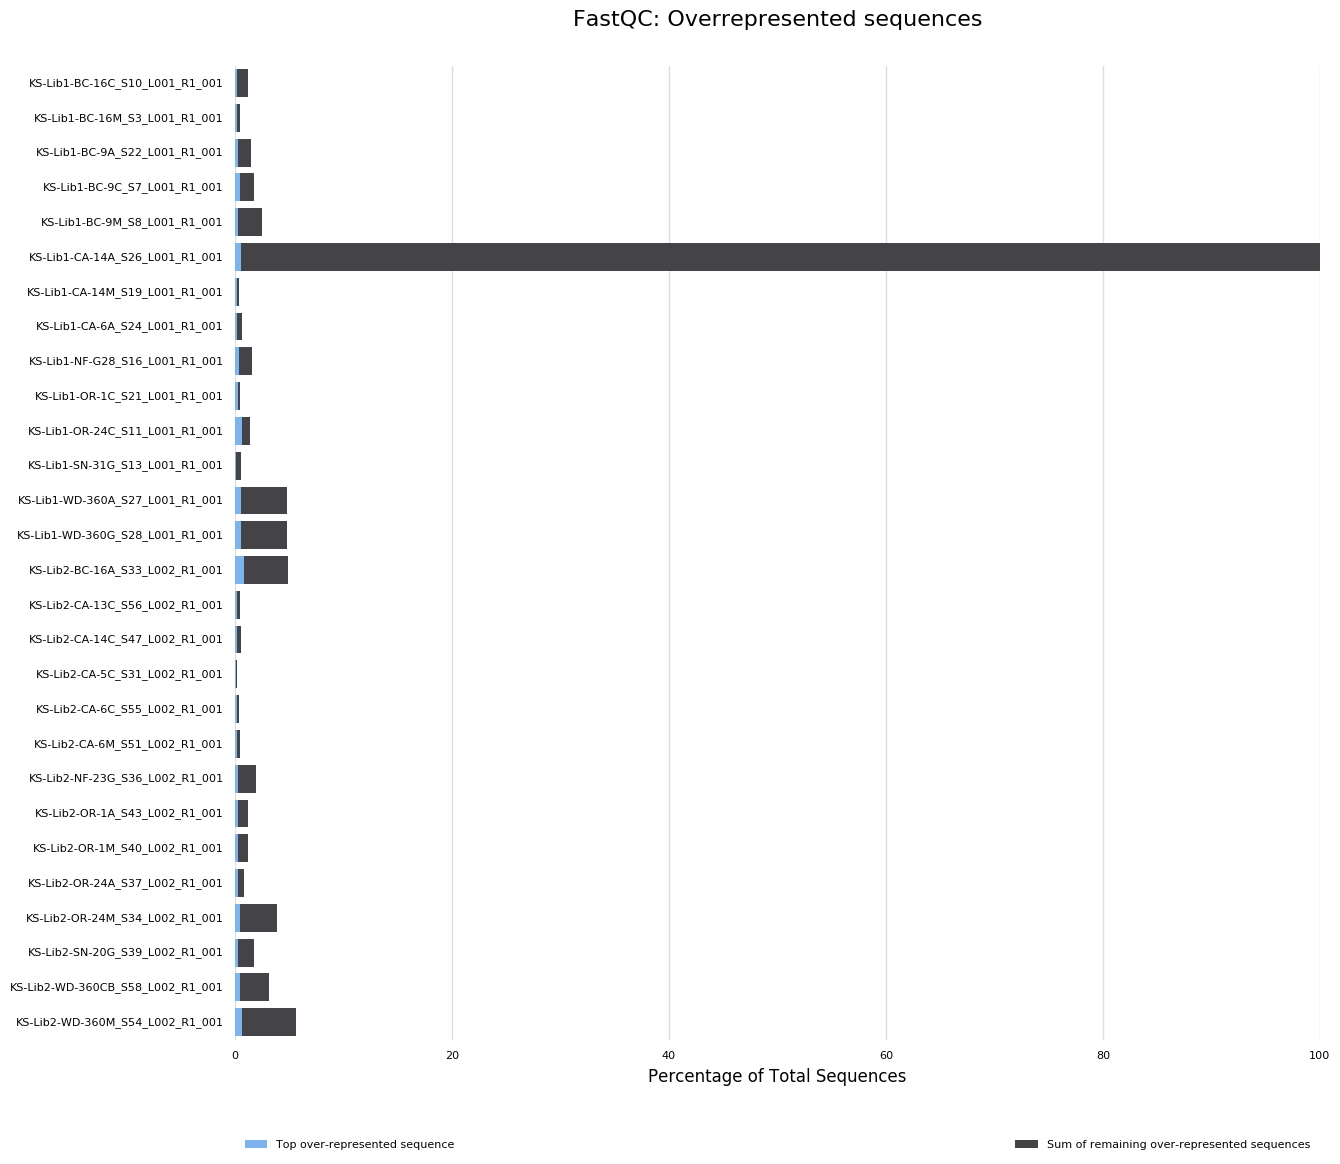
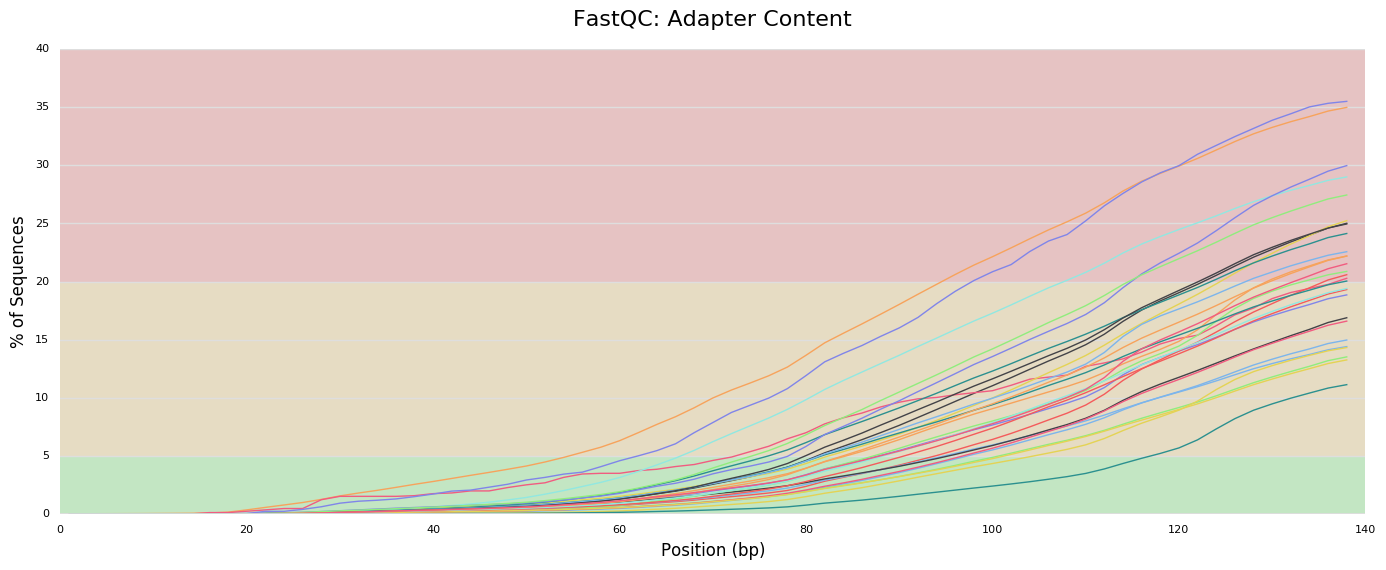
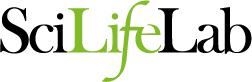

In [3]:
from IPython.core.display import display, HTML
display(HTML('/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/raw_2500_oyster_multiqc.html'))

## Trimming

In [4]:
%%sh
module load gcc/6.2.0
module load fastx_toolkit/0.0.14

mkdir /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/trimmed

for i in /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/201802_2500_Raw/Oyster/*.fastq; 
    do fastx_trimmer -l 75 -i $i | fastx_clipper -a AAAAAAAA -l 20 -Q33 | \
    fastx_clipper -a AGATCGGAAG -l 20 -Q33 | \
    fastq_quality_filter -Q33 -q 20 -p 90 > ${i/R1_001.fastq/trim_75.fq};
done 

mv /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/201802_2500_Raw/Oyster/*trim* /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/trimmed 

In [5]:
%%sh
module load java-jdk/1.8.0_92
module load fastqc/0.11.5

fastqc -o /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/ --extract /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/trimmed/*fq -t 10

Analysis complete for KS-Lib1-CA-14A_S26_L001_trim_75.fq
Analysis complete for KS-Lib1-BC-16C_S10_L001_trim_75.fq
Analysis complete for KS-Lib1-BC-16M_S3_L001_trim_75.fq
Analysis complete for KS-Lib1-CA-6A_S24_L001_trim_75.fq
Analysis complete for KS-Lib1-BC-9A_S22_L001_trim_75.fq
Analysis complete for KS-Lib1-OR-1C_S21_L001_trim_75.fq
Analysis complete for KS-Lib1-BC-9M_S8_L001_trim_75.fq
Analysis complete for KS-Lib1-CA-14M_S19_L001_trim_75.fq
Analysis complete for KS-Lib1-NF-G28_S16_L001_trim_75.fq
Analysis complete for KS-Lib1-BC-9C_S7_L001_trim_75.fq
Analysis complete for KS-Lib1-OR-24C_S11_L001_trim_75.fq
Analysis complete for KS-Lib1-SN-31G_S13_L001_trim_75.fq
Analysis complete for KS-Lib1-WD-360A_S27_L001_trim_75.fq
Analysis complete for KS-Lib2-BC-16A_S33_L002_trim_75.fq
Analysis complete for KS-Lib1-WD-360G_S28_L001_trim_75.fq
Analysis complete for KS-Lib2-CA-5C_S31_L002_trim_75.fq
Analysis complete for KS-Lib2-CA-6M_S51_L002_trim_75.fq
Analysis complete for KS-Lib2-OR-24M_S3

Started analysis of KS-Lib1-BC-16C_S10_L001_trim_75.fq
Started analysis of KS-Lib1-BC-16M_S3_L001_trim_75.fq
Approx 5% complete for KS-Lib1-BC-16C_S10_L001_trim_75.fq
Started analysis of KS-Lib1-BC-9A_S22_L001_trim_75.fq
Approx 10% complete for KS-Lib1-BC-16C_S10_L001_trim_75.fq
Approx 5% complete for KS-Lib1-BC-16M_S3_L001_trim_75.fq
Approx 5% complete for KS-Lib1-BC-9A_S22_L001_trim_75.fq
Approx 15% complete for KS-Lib1-BC-16C_S10_L001_trim_75.fq
Started analysis of KS-Lib1-BC-9C_S7_L001_trim_75.fq
Approx 10% complete for KS-Lib1-BC-16M_S3_L001_trim_75.fq
Approx 20% complete for KS-Lib1-BC-16C_S10_L001_trim_75.fq
Approx 10% complete for KS-Lib1-BC-9A_S22_L001_trim_75.fq
Started analysis of KS-Lib1-BC-9M_S8_L001_trim_75.fq
Approx 15% complete for KS-Lib1-BC-16M_S3_L001_trim_75.fq
Approx 25% complete for KS-Lib1-BC-16C_S10_L001_trim_75.fq
Approx 15% complete for KS-Lib1-BC-9A_S22_L001_trim_75.fq
Approx 5% complete for KS-Lib1-BC-9C_S7_L001_trim_75.fq
Started analysis of KS-Lib1-CA-14A_

In [6]:
%%sh
multiqc -n trim_2500_oyster_multiqc /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/*trim* -o /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/

Searching 559 files..


[INFO   ]         multiqc : This is MultiQC v1.4
[INFO   ]         multiqc : Template    : default
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/KS-Lib1-BC-16C_S10_L001_trim_75_fastqc'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/KS-Lib1-BC-16C_S10_L001_trim_75_fastqc.html'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/KS-Lib1-BC-16C_S10_L001_trim_75_fastqc.zip'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/KS-Lib1-BC-16M_S3_L001_trim_75_fastqc'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/KS-Lib1-BC-16M_S3_L001_trim_75_fastqc.html'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/KS-Lib1-BC-16M_S3_L001_trim_75_fastqc.zip'
[INFO   ]         multiqc : Search

In [ ]:
from IPython.core.display import display, HTML
display(HTML('/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/QC_Output/trim_2500_oyster_multiqc.html'))

Looks much better

## Mapping

In [78]:
%%sh
module load intel/2017
module load bowtie2/2.3.2

bowtie2-build /scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/Trinity.fasta /scratch/t.cri.ksilliman/OA_RNA/Oyster/trinity-v2-oyster

Settings:
  Output files: "/scratch/t.cri.ksilliman/OA_RNA/Oyster/trinity-v2-oyster.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/Trinity.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:55
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:03
bmax according to bmaxDivN setting: 90945310
Using parameters --bmax 68208983 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constru

Building a SMALL index


In [79]:
%%sh
module load intel/2017
module load bowtie2/2.3.2

mkdir /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/mapped/

cd /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/trimmed/
for i in *.fq; do
    S="/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/mapped/${i/trim_75.fq/bt2.sam}"
    out="/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/mapped/${i/trim_75.fq/bt2.stout}"
    bowtie2 --local -x /scratch/t.cri.ksilliman/OA_RNA/Oyster/trinity-v2-oyster -U $i -S $S --no-hd --no-sq --no-unal -k 5 -p 10 2> $out;
done


In [80]:
%%sh
for i in /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/mapped/*.stout; do
    echo ${i/\/scratch\/t.cri.ksilliman\/OA_RNA\/QuantSeq_2500\/Oyster\/mapped\/KS/KS}
    grep "overall alignment rate" $i
done

KS-Lib1-BC-16C_S10_L001_bt2.stout
86.50% overall alignment rate
KS-Lib1-BC-16M_S3_L001_bt2.stout
85.21% overall alignment rate
KS-Lib1-BC-9A_S22_L001_bt2.stout
87.53% overall alignment rate
KS-Lib1-BC-9C_S7_L001_bt2.stout
83.11% overall alignment rate
KS-Lib1-BC-9M_S8_L001_bt2.stout
86.85% overall alignment rate
KS-Lib1-CA-14A_S26_L001_bt2.stout
24.29% overall alignment rate
KS-Lib1-CA-14M_S19_L001_bt2.stout
84.67% overall alignment rate
KS-Lib1-CA-6A_S24_L001_bt2.stout
85.86% overall alignment rate
KS-Lib1-NF-G28_S16_L001_bt2.stout
88.63% overall alignment rate
KS-Lib1-OR-1C_S21_L001_bt2.stout
84.76% overall alignment rate
KS-Lib1-OR-24C_S11_L001_bt2.stout
84.15% overall alignment rate
KS-Lib1-SN-31G_S13_L001_bt2.stout
85.06% overall alignment rate
KS-Lib1-WD-360A_S27_L001_bt2.stout
90.74% overall alignment rate
KS-Lib1-WD-360G_S28_L001_bt2.stout
88.89% overall alignment rate
KS-Lib2-BC-16A_S33_L002_bt2.stout
87.84% overall alignment rate
KS-Lib2-CA-13C_S56_L002_bt2.stout
85.41% overa

### Map counts

In [81]:
%pwd

u'/home/t.cri.ksilliman/OA_RNA/QC_Output'

In [34]:
infile = "/scratch/t.cri.ksilliman/OA_RNA/Evans_part.tab"
outfile= "/scratch/t.cri.ksilliman/OA_RNA/Evans_iso.tab"

IN = open(infile,"r")
OUT= open(outfile,"w")

i = 1
for line in IN:
    contig = line.strip().split()
    if len(contig) < 2:
        contig.append("C_"+str(i))
        i += 1
        OUT.write('\t'.join(map(str,contig))+"\n")
    else: 
        c = contig[0]
        r = '_'.join(map(str,contig[1:]))+"\n"
        OUT.write(c+'\t'+r)
    contig= []
IN.close()
OUT.close()
        

In [35]:
%%sh

for i in /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/mapped/*.sam; do
    /home/t.cri.ksilliman/OA_RNA/tag-based_RNAseq/samcount.pl $i /scratch/t.cri.ksilliman/OA_RNA/Evans_iso.tab aligner=bowtie2 >${i/.sam/.sam.counts}
done

In [39]:
%%sh
cd /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/mapped/
/home/t.cri.ksilliman/OA_RNA/tag-based_RNAseq/expression_compiler.pl *.sam.counts > allcounts.txt

In [40]:
%%sh
cat /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/mapped/allcounts.txt

	KS-Lib1-BC-16C_S10_L001_bt2.sam.counts	KS-Lib1-BC-16M_S3_L001_bt2.sam.counts	KS-Lib1-BC-9A_S22_L001_bt2.sam.counts	KS-Lib1-BC-9C_S7_L001_bt2.sam.counts	KS-Lib1-BC-9M_S8_L001_bt2.sam.counts	KS-Lib1-CA-14A_S26_L001_bt2.sam.counts	KS-Lib1-CA-14M_S19_L001_bt2.sam.counts	KS-Lib1-CA-6A_S24_L001_bt2.sam.counts	KS-Lib1-NF-G28_S16_L001_bt2.sam.counts	KS-Lib1-OR-1C_S21_L001_bt2.sam.counts	KS-Lib1-OR-24C_S11_L001_bt2.sam.counts	KS-Lib1-SN-31G_S13_L001_bt2.sam.counts	KS-Lib1-WD-360A_S27_L001_bt2.sam.counts	KS-Lib1-WD-360G_S28_L001_bt2.sam.counts	KS-Lib2-BC-16A_S33_L002_bt2.sam.counts	KS-Lib2-CA-13C_S56_L002_bt2.sam.counts	KS-Lib2-CA-14C_S47_L002_bt2.sam.counts	KS-Lib2-CA-5C_S31_L002_bt2.sam.counts	KS-Lib2-CA-6C_S55_L002_bt2.sam.counts	KS-Lib2-CA-6M_S51_L002_bt2.sam.counts	KS-Lib2-NF-23G_S36_L002_bt2.sam.counts	KS-Lib2-OR-1A_S43_L002_bt2.sam.counts	KS-Lib2-OR-1M_S40_L002_bt2.sam.counts	KS-Lib2-OR-24A_S37_L002_bt2.sam.counts	KS-Lib2-OR-24M_S34_L002_bt2.sam.counts	KS-Lib2-SN-20G_S39_L002_bt2.sam.cou

In [2]:
%%sh
#Making a STAR index
module load gcc/4.9.4
module load STAR/2.5.3a

cd /scratch/t.cri.ksilliman/OA_RNA/

STAR --runThreadN 10 --runMode genomeGenerate --genomeDir ./Evans_transcriptome_STAR/ --genomeFastaFiles ./Evans_transcriptome.fasta --limitGenomeGenerateRAM 37000000000 

Feb 15 10:10:14 ..... started STAR run
Feb 15 10:10:14 ... starting to generate Genome files
Feb 15 10:11:26 ... starting to sort Suffix Array. This may take a long time...
Feb 15 10:11:59 ... sorting Suffix Array chunks and saving them to disk...
Feb 15 10:12:44 ... loading chunks from disk, packing SA...
Feb 15 10:13:04 ... finished generating suffix array
Feb 15 10:13:04 ... generating Suffix Array index
Feb 15 10:13:31 ... completed Suffix Array index
Feb 15 10:13:31 ... writing Genome to disk ...
Feb 15 10:14:32 ... writing Suffix Array to disk ...
Feb 15 10:14:36 ... writing SAindex to disk
Feb 15 10:14:42 ..... finished successfully


In [9]:
%%sh
module load gcc/4.9.4
module load STAR/2.5.3a

cd /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/trimmed/
for i in *.fq; do
    out_prefix="/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/mapped/${i/trim_75.fq/star_}"
    STAR --runThreadN 10 --genomeDir /scratch/t.cri.ksilliman/OA_RNA/Evans_transcriptome_STAR/ \
    --readFilesIn $i --outFilterType BySJout --outFilterMultimapNmax 20 --alignSJoverhangMin 8 \
    --alignSJDBoverhangMin 1 --outFilterMismatchNmax 999 --outFilterMismatchNoverLmax 0.6 \
    --alignIntronMin 20 --alignIntronMax 1000000 --alignMatesGapMax 1000000 --outSAMattributes NH HI NM MD \
    --outSAMtype BAM SortedByCoordinate --outFileNamePrefix $out_prefix 
done

Feb 16 15:48:33 ..... started STAR run
Feb 16 15:48:33 ..... loading genome
Feb 16 15:50:08 ..... started mapping
Feb 16 15:50:33 ..... started sorting BAM
Feb 16 15:50:36 ..... finished successfully
Feb 16 15:50:37 ..... started STAR run
Feb 16 15:50:37 ..... loading genome
Feb 16 15:51:38 ..... started mapping
Feb 16 15:52:09 ..... started sorting BAM
Feb 16 15:52:13 ..... finished successfully
Feb 16 15:52:13 ..... started STAR run
Feb 16 15:52:13 ..... loading genome
Feb 16 15:52:45 ..... started mapping
Feb 16 15:53:06 ..... started sorting BAM
Feb 16 15:53:09 ..... finished successfully
Feb 16 15:53:09 ..... started STAR run
Feb 16 15:53:10 ..... loading genome
Feb 16 15:53:32 ..... started mapping
Feb 16 15:54:05 ..... started sorting BAM
Feb 16 15:54:09 ..... finished successfully
Feb 16 15:54:09 ..... started STAR run
Feb 16 15:54:09 ..... loading genome
Feb 16 15:54:48 ..... started mapping
Feb 16 15:55:17 ..... started sorting BAM
Feb 16 15:55:19 ..... finished successfully


In [10]:
%%sh
for i in /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Oyster/mapped/*_star_Log.final.out; do
    echo ${i/\/scratch\/t.cri.ksilliman\/OA_RNA\/QuantSeq_2500\/Oyster\/mapped\/KS/KS}
    grep "% of reads unmapped" $i
done

KS-Lib1-BC-16C_S10_L001_star_Log.final.out
       % of reads unmapped: too many mismatches |	0.00%
                 % of reads unmapped: too short |	39.18%
                     % of reads unmapped: other |	0.00%
KS-Lib1-BC-16M_S3_L001_star_Log.final.out
       % of reads unmapped: too many mismatches |	0.00%
                 % of reads unmapped: too short |	41.28%
                     % of reads unmapped: other |	0.00%
KS-Lib1-BC-9A_S22_L001_star_Log.final.out
       % of reads unmapped: too many mismatches |	0.00%
                 % of reads unmapped: too short |	33.08%
                     % of reads unmapped: other |	0.00%
KS-Lib1-BC-9C_S7_L001_star_Log.final.out
       % of reads unmapped: too many mismatches |	0.00%
                 % of reads unmapped: too short |	50.07%
                     % of reads unmapped: other |	0.00%
KS-Lib1-BC-9M_S8_L001_star_Log.final.out
       % of reads unmapped: too many mismatches |	0.00%
                 % of reads unmapped: too short |	43.24%
  

In [8]:
%%sh
module load gcc/6.2.0
module load samtools/1.6.0

samtools index /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/mapped/starAligned.sortedByCoord.out.bam

# Scallop

In [ ]:
%%sh
module load java-jdk/1.8.0_92
module load fastqc/0.11.5

mkdir /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output

fastqc -o /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output --extract /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/201802_2500_Raw/Scallop/*fastq -t 10

In [12]:
%%sh
multiqc -n raw_2500_scallop_multiqc /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/ --flat -o /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/

Searching 559 files..


[INFO   ]         multiqc : This is MultiQC v1.4
[INFO   ]         multiqc : Template    : default
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/'
[INFO   ]          fastqc : Found 28 reports
[INFO   ]         multiqc : Compressing plot data
[INFO   ]         multiqc : Report      : ../../../../scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/raw_2500_scallop_multiqc.html
[INFO   ]         multiqc : Data        : ../../../../scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/raw_2500_scallop_multiqc_data
[INFO   ]         multiqc : MultiQC complete



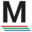
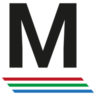
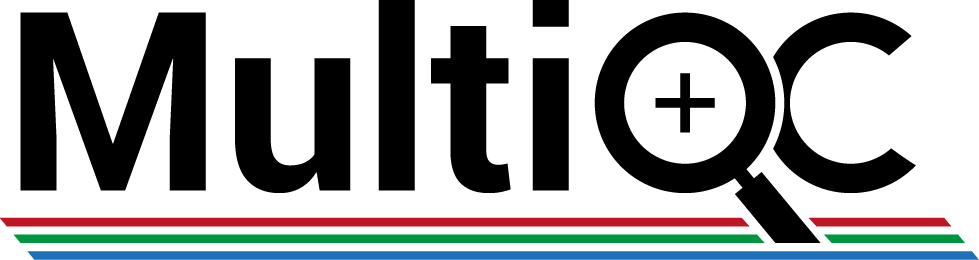
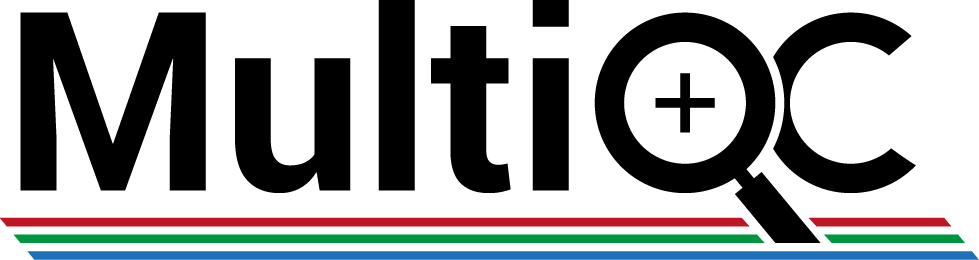
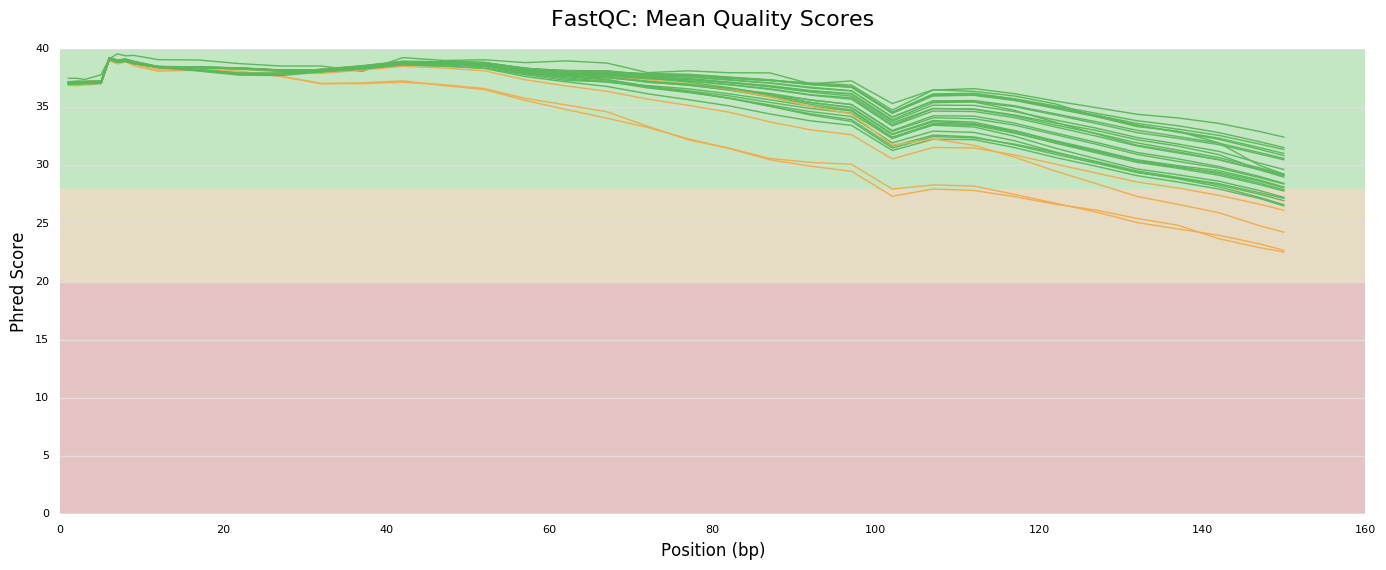
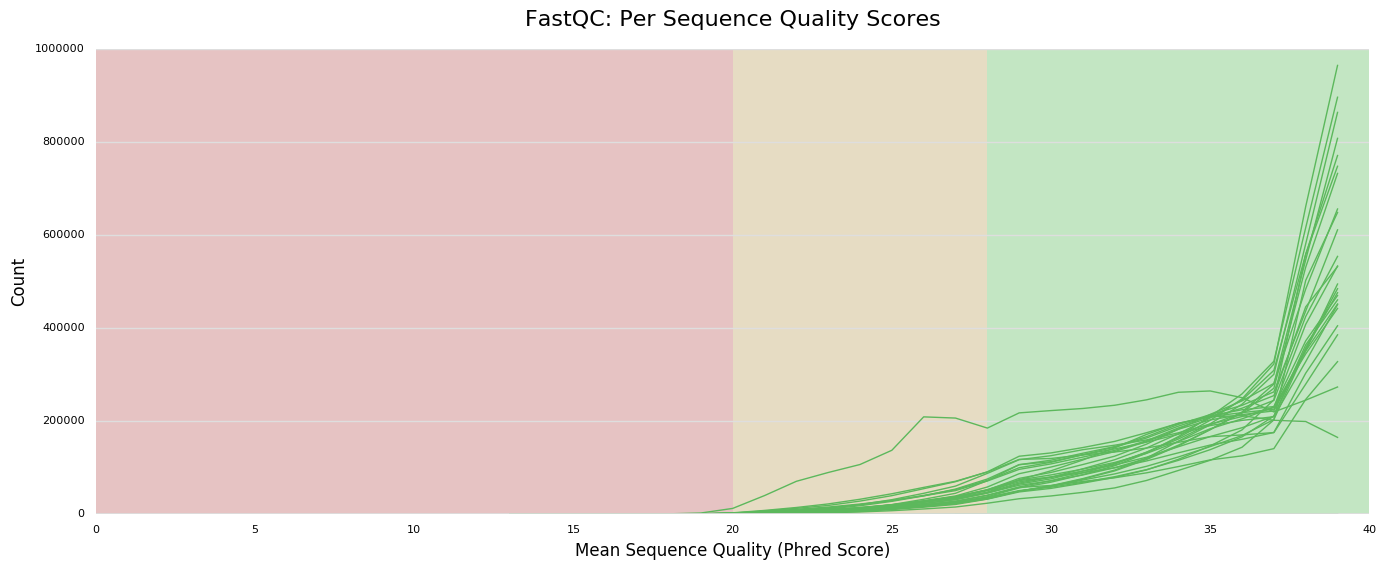
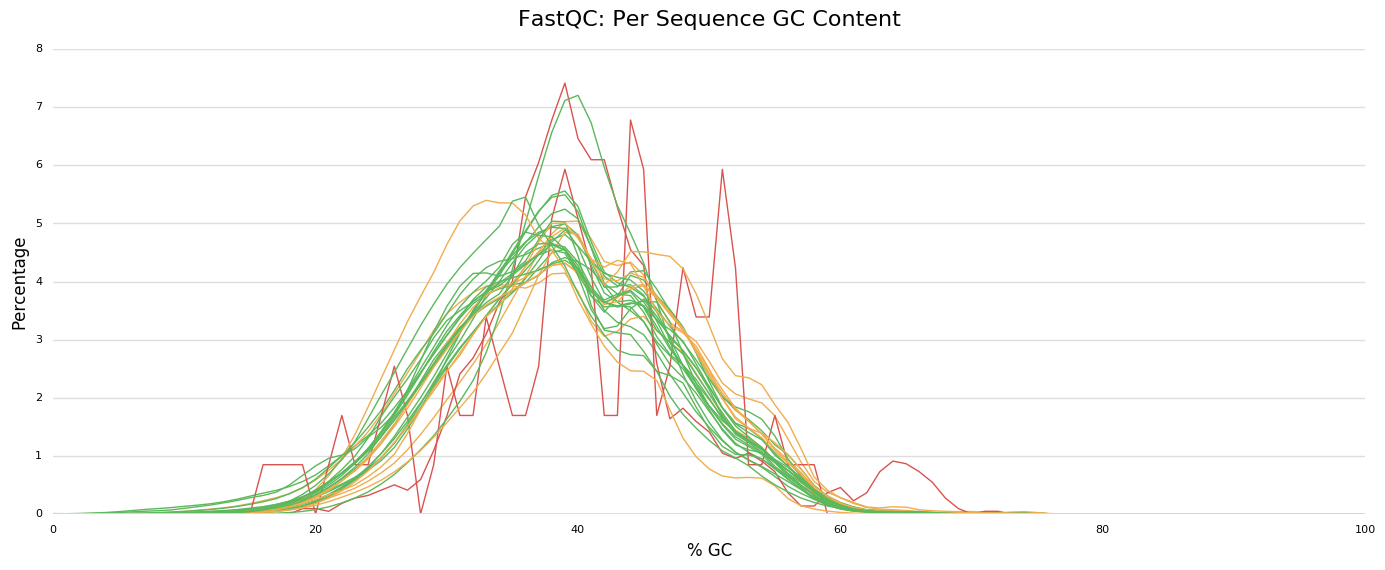
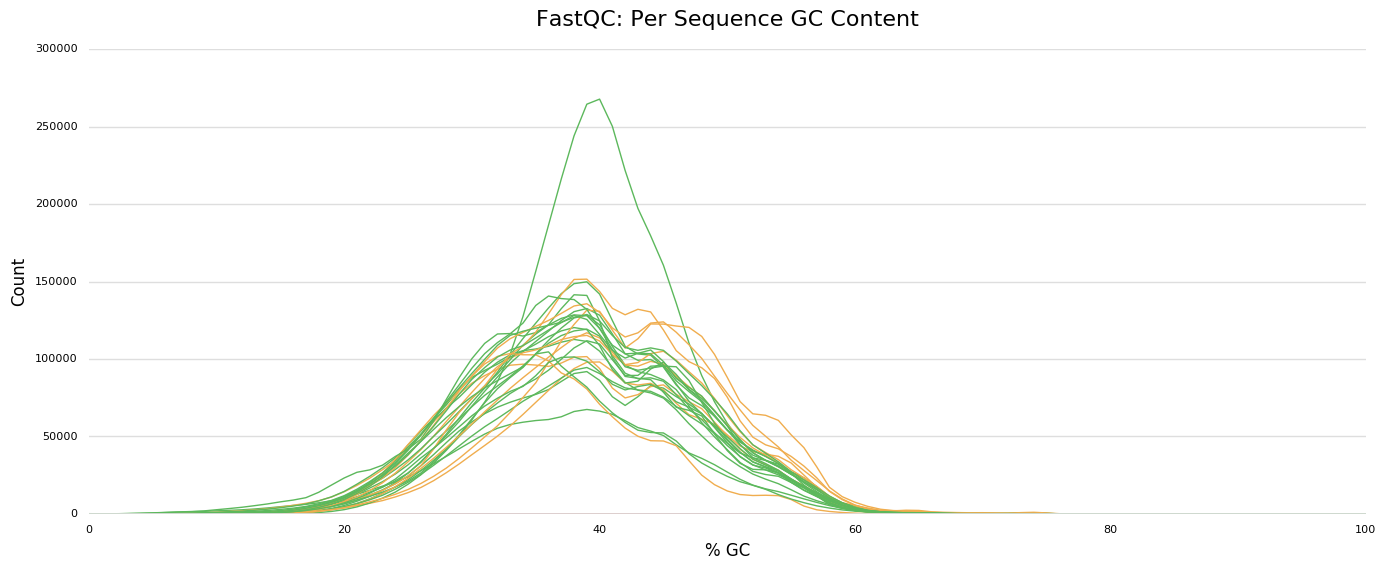
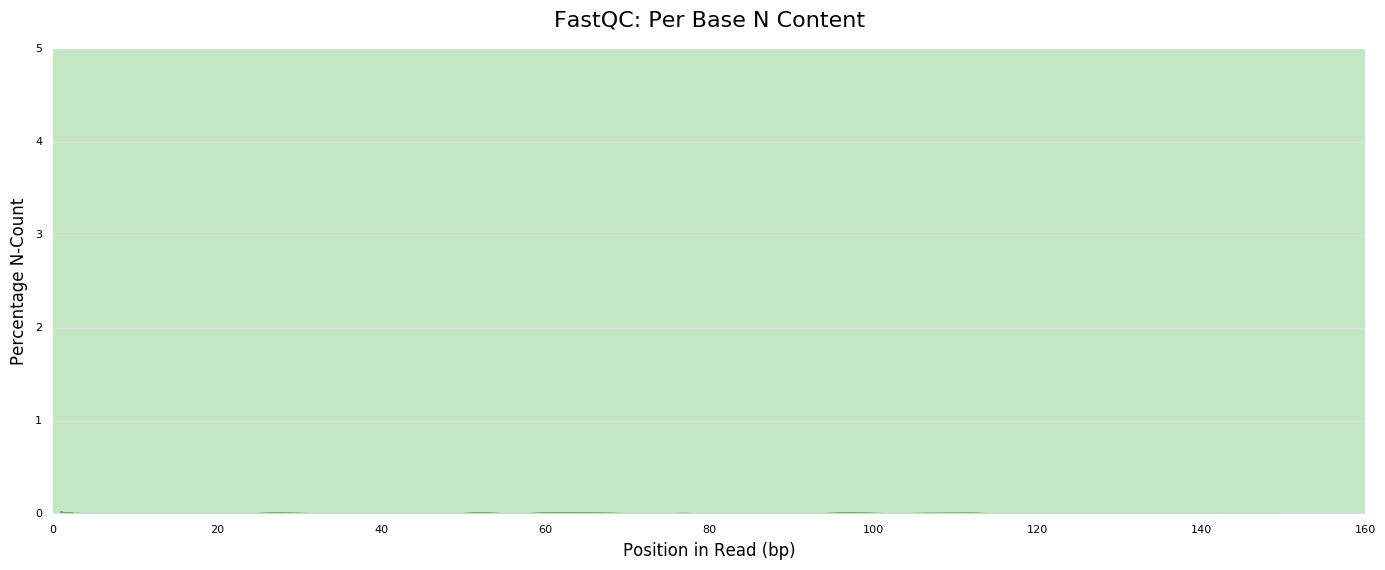
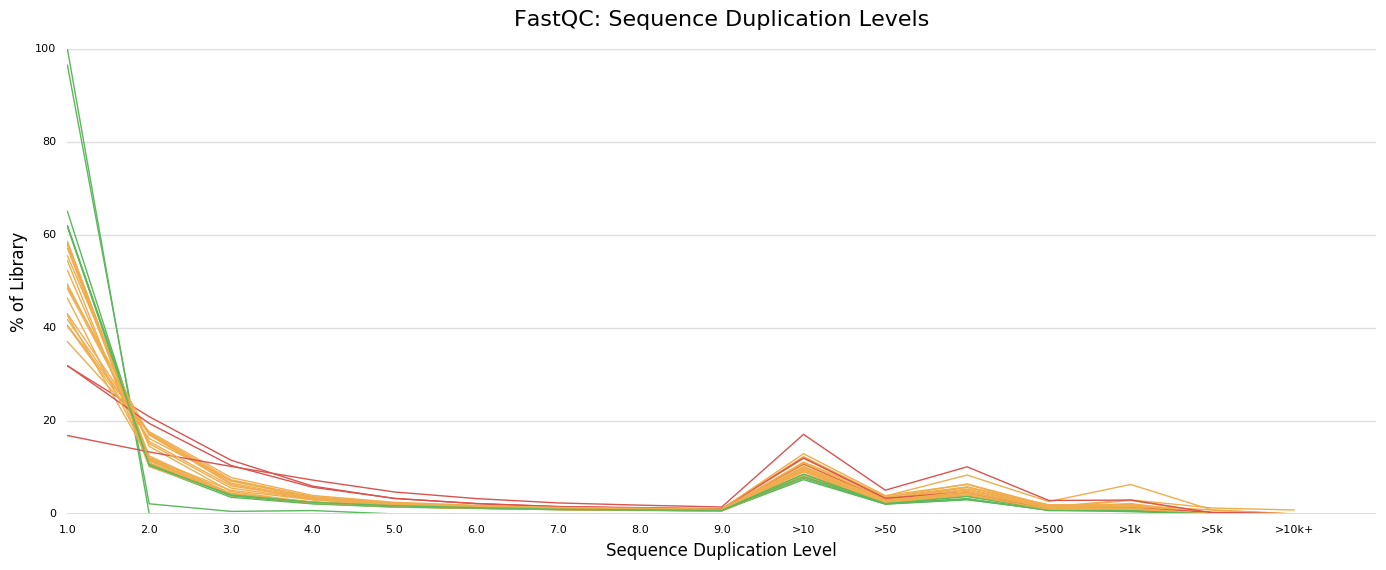
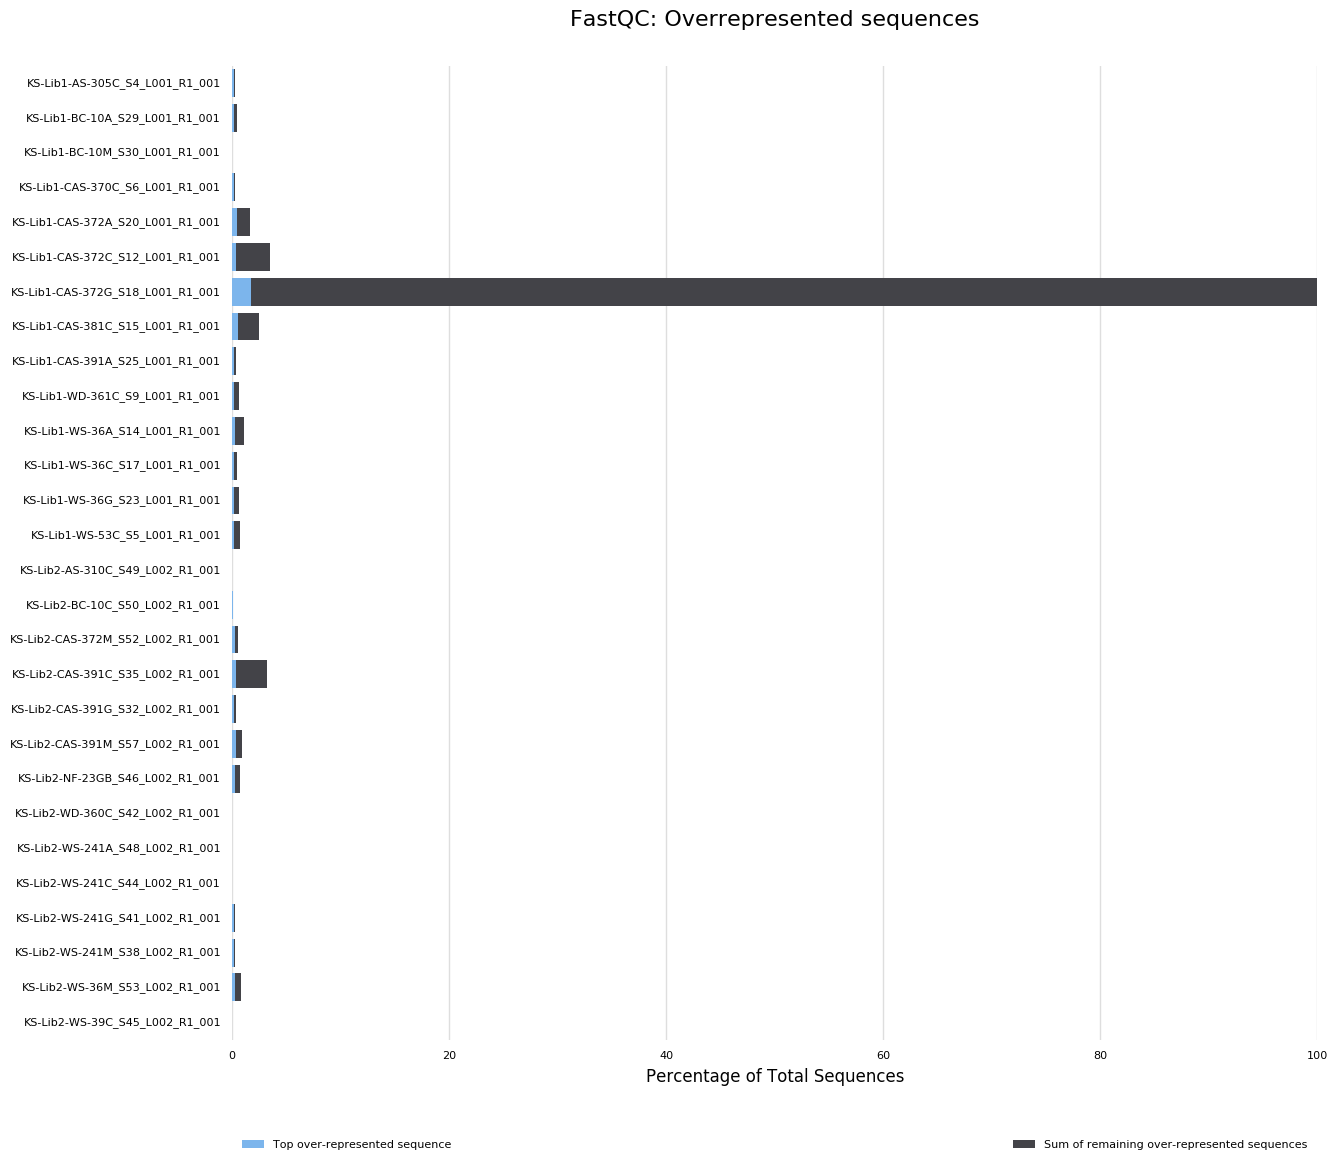
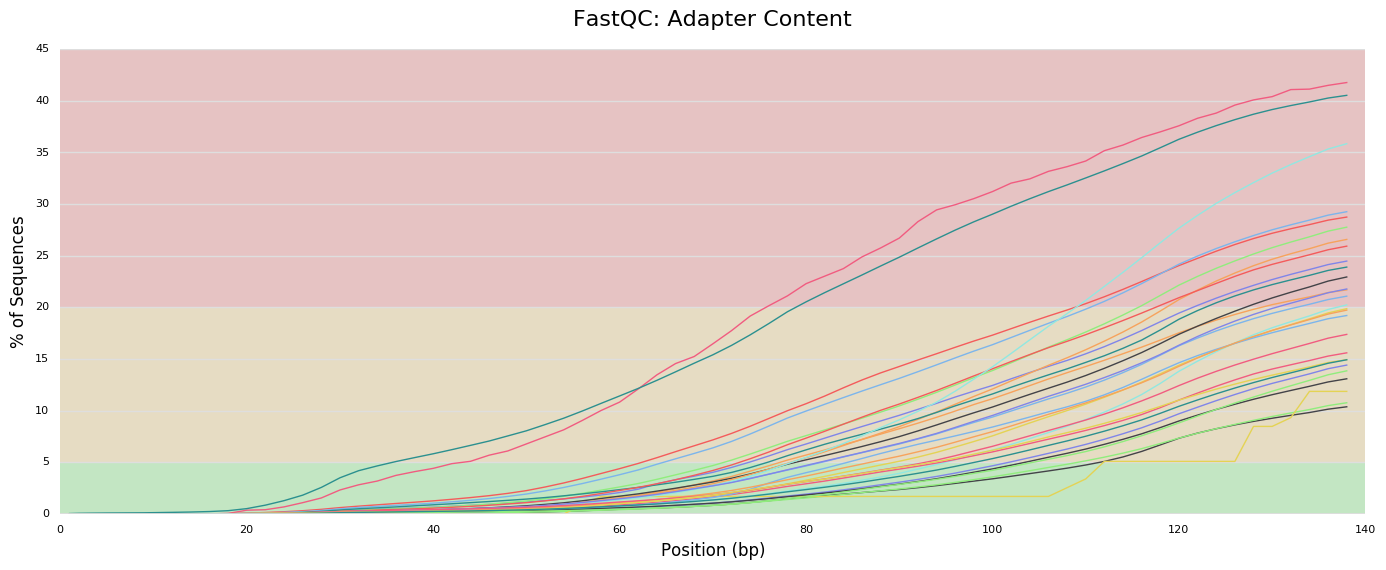
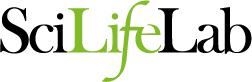

In [13]:
from IPython.core.display import display, HTML
display(HTML('/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/raw_2500_scallop_multiqc.html'))

### Trimming

In [14]:
%%sh
module load gcc/6.2.0
module load fastx_toolkit/0.0.14

mkdir /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/trimmed

for i in /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/201802_2500_Raw/Scallop/*.fastq; 
    do fastx_trimmer -l 75 -i $i | fastx_clipper -a AAAAAAAA -l 20 -Q33 | \
    fastx_clipper -a AGATCGGAAG -l 20 -Q33 | \
    fastq_quality_filter -Q33 -q 20 -p 90 > ${i/R1_001.fastq/trim_75.fq};
done 

mv /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/201802_2500_Raw/Scallop/*trim* /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/trimmed 

In [ ]:
%%sh
module load java-jdk/1.8.0_92
module load fastqc/0.11.5

fastqc -o /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/ --extract /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/trimmed/*fq -t 10

In [16]:
%%sh
multiqc -n trim_2500_scallop_multiqc /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/*trim* -o /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/

Searching 559 files..


[INFO   ]         multiqc : This is MultiQC v1.4
[INFO   ]         multiqc : Template    : default
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/KS-Lib1-AS-305C_S4_L001_trim_75_fastqc'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/KS-Lib1-AS-305C_S4_L001_trim_75_fastqc.html'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/KS-Lib1-AS-305C_S4_L001_trim_75_fastqc.zip'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/KS-Lib1-BC-10A_S29_L001_trim_75_fastqc'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/KS-Lib1-BC-10A_S29_L001_trim_75_fastqc.html'
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/QC_Output/KS-Lib1-BC-10A_S29_L001_trim_75_fastqc.zip'
[INFO   ]         multiqc

### Mapping

In [41]:
%%sh
module load intel/2017
module load bowtie2/2.3.2

bowtie2-build /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/Trinity.fasta /scratch/t.cri.ksilliman/OA_RNA/Scallop/trinity-v1-scallop

Settings:
  Output files: "/scratch/t.cri.ksilliman/OA_RNA/Scallop/trinity-v1-scallop.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/Trinity.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:07
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:03
bmax according to bmaxDivN setting: 95439859
Using parameters --bmax 71579895 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Con

Building a SMALL index


In [42]:
%%sh
module load intel/2017
module load bowtie2/2.3.2

mkdir /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/mapped/

cd /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/trimmed/
for i in *.fq; do
    S="/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/mapped/${i/trim_75.fq/bt2.sam}"
    out="/scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/mapped/${i/trim_75.fq/bt2.stout}"
    bowtie2 --local -x /scratch/t.cri.ksilliman/OA_RNA/Scallop/trinity-v1-scallop -U $i -S $S --no-hd --no-sq --no-unal -k 5 -p 10 2> $out;
done

In [43]:
%%sh
for i in /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/mapped/*.stout; do
    echo ${i/\/scratch\/t.cri.ksilliman\/OA_RNA\/QuantSeq_2500\/Scallop\/mapped\/KS/KS}
    grep "overall alignment rate" $i
done

KS-Lib1-AS-305C_S4_L001_bt2.stout
86.45% overall alignment rate
KS-Lib1-BC-10A_S29_L001_bt2.stout
90.16% overall alignment rate
KS-Lib1-BC-10M_S30_L001_bt2.stout
89.34% overall alignment rate
KS-Lib1-CAS-370C_S6_L001_bt2.stout
86.01% overall alignment rate
KS-Lib1-CAS-372A_S20_L001_bt2.stout
89.23% overall alignment rate
KS-Lib1-CAS-372C_S12_L001_bt2.stout
76.20% overall alignment rate
KS-Lib1-CAS-372G_S18_L001_bt2.stout
85.45% overall alignment rate
KS-Lib1-CAS-381C_S15_L001_bt2.stout
81.07% overall alignment rate
KS-Lib1-CAS-391A_S25_L001_bt2.stout
89.00% overall alignment rate
KS-Lib1-WD-361C_S9_L001_bt2.stout
87.48% overall alignment rate
KS-Lib1-WS-36A_S14_L001_bt2.stout
87.15% overall alignment rate
KS-Lib1-WS-36C_S17_L001_bt2.stout
86.87% overall alignment rate
KS-Lib1-WS-36G_S23_L001_bt2.stout
86.00% overall alignment rate
KS-Lib1-WS-53C_S5_L001_bt2.stout
86.52% overall alignment rate
KS-Lib2-AS-310C_S49_L002_bt2.stout
87.97% overall alignment rate
KS-Lib2-BC-10C_S50_L002_bt2.s

### Map counts

In [68]:
infile = "/scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/Trinity.fasta"
outfile = "/scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-v1_seq2iso.tab"

IN= open(infile, "r")
OUT= open(outfile, "w")
for line in IN:
    if ">" in line:
        stuff = line.split()
        name = stuff[0].split("_")
        OUT.write(stuff[0][1:]+"\t"+'_'.join(map(str,name[:-1]))+"\n")
IN.close()
OUT.close()
#head /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-Trinity-v1/Trinity.fasta -n 100 | tail -n 20
#perl -pe 's/^>(\S+)\|(\S+)(_i\d+)\s.+/$1\|$2$3\t$1_$2/' > /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-v1_seq2iso.tab

In [69]:
%%sh
head /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-v1_seq2iso.tab

TRINITY_DN192_c0_g1_i1	>TRINITY_DN192_c0_g1
TRINITY_DN141_c0_g1_i1	>TRINITY_DN141_c0_g1
TRINITY_DN163_c0_g1_i1	>TRINITY_DN163_c0_g1
TRINITY_DN194_c0_g1_i1	>TRINITY_DN194_c0_g1
TRINITY_DN175_c0_g1_i1	>TRINITY_DN175_c0_g1
TRINITY_DN114_c0_g1_i1	>TRINITY_DN114_c0_g1
TRINITY_DN174_c0_g1_i1	>TRINITY_DN174_c0_g1
TRINITY_DN144_c0_g1_i1	>TRINITY_DN144_c0_g1
TRINITY_DN180_c0_g1_i1	>TRINITY_DN180_c0_g1
TRINITY_DN177_c0_g1_i1	>TRINITY_DN177_c0_g1


In [74]:
%%sh

for i in /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/mapped/*.sam; do
    /home/t.cri.ksilliman/OA_RNA/tag-based_RNAseq/samcount.pl $i /scratch/t.cri.ksilliman/OA_RNA/Scallop/scallop-v1_seq2iso.tab aligner=bowtie2 >${i/.sam/.sam.counts}
done

disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads mapping to multiple isogroups
disregarding reads m

In [75]:
%%sh
cd /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/mapped/
/home/t.cri.ksilliman/OA_RNA/tag-based_RNAseq/expression_compiler.pl *.sam.counts > scallopv1_allcounts.txt

In [77]:
%%sh
head /scratch/t.cri.ksilliman/OA_RNA/QuantSeq_2500/Scallop/mapped/scallopv1_allcounts.txt

	KS-Lib1-AS-305C_S4_L001_bt2.sam.counts	KS-Lib1-BC-10A_S29_L001_bt2.sam.counts	KS-Lib1-BC-10M_S30_L001_bt2.sam.counts	KS-Lib1-CAS-370C_S6_L001_bt2.sam.counts	KS-Lib1-CAS-372A_S20_L001_bt2.sam.counts	KS-Lib1-CAS-372C_S12_L001_bt2.sam.counts	KS-Lib1-CAS-372G_S18_L001_bt2.sam.counts	KS-Lib1-CAS-381C_S15_L001_bt2.sam.counts	KS-Lib1-CAS-391A_S25_L001_bt2.sam.counts	KS-Lib1-WD-361C_S9_L001_bt2.sam.counts	KS-Lib1-WS-36A_S14_L001_bt2.sam.counts	KS-Lib1-WS-36C_S17_L001_bt2.sam.counts	KS-Lib1-WS-36G_S23_L001_bt2.sam.counts	KS-Lib1-WS-53C_S5_L001_bt2.sam.counts	KS-Lib2-AS-310C_S49_L002_bt2.sam.counts	KS-Lib2-BC-10C_S50_L002_bt2.sam.counts	KS-Lib2-CAS-372M_S52_L002_bt2.sam.counts	KS-Lib2-CAS-391C_S35_L002_bt2.sam.counts	KS-Lib2-CAS-391G_S32_L002_bt2.sam.counts	KS-Lib2-CAS-391M_S57_L002_bt2.sam.counts	KS-Lib2-NF-23GB_S46_L002_bt2.sam.counts	KS-Lib2-WD-360C_S42_L002_bt2.sam.counts	KS-Lib2-WS-241A_S48_L002_bt2.sam.counts	KS-Lib2-WS-241C_S44_L002_bt2.sam.counts	KS-Lib2-WS-241G_S41_L002_bt2.sam.counts	